In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

In [2]:
def metropolis_hastings(uniform_rng, chain_start, n, logtarget, candidate_generating_density):
    x = chain_start
    chain = np.zeros(2 * n).reshape(2,n,1)
    accepted = 0
    
    for i in range(n):
        candidate = candidate_generating_density(x)
        
        if np.log(uniform_rng.uniform()) < logtarget(candidate) - logtarget(x):
            x = candidate
            accepted += 1
        
        chain[:,i,:] = x
        
    print(f"Hyväksyttyjä kandidaatteja: {(accepted/n)*100:.1f} %")
    return chain

In [3]:
uniform_rng = RandomState(1729)
proposal_rng = RandomState(2)

mu = np.array([[1], [2]])
sigma = np.array([[1, 0.9], [0.9, 1]])
sigma_inverse = np.linalg.inv(sigma)

# Multinormaalijakauman tiheysfunktion logaritmi ilman normalisointivakioita
logtarget = lambda x: -0.5 * np.transpose(x - mu) @ sigma_inverse @ (x - mu)
# Autoregressive generating density
proposal_density = lambda x: mu - (x - mu) + uniform_rng.uniform(low=-1, high=1, size=2).reshape(2,1)

chain = metropolis_hastings(uniform_rng, np.array([[1.0], [2.0]]), 12000, logtarget, proposal_density)
print(f"Ketjun muoto {chain.shape}")

chain_without_burn_in = chain[:, chain.shape[1] // 2:, :]
print(f"Ketjun muoto burn-in jakson poiston jälkeen {chain_without_burn_in.shape}")


Hyväksyttyjä kandidaatteja: 47.0 %
Ketjun muoto (2, 12000, 1)
Ketjun muoto burn-in jakson poiston jälkeen (2, 6000, 1)


In [4]:
multinormal_rng = RandomState(99)
numpy_multinormal = multinormal_rng.multivariate_normal(mean=mu.reshape(2,), cov=sigma, size=4000).T

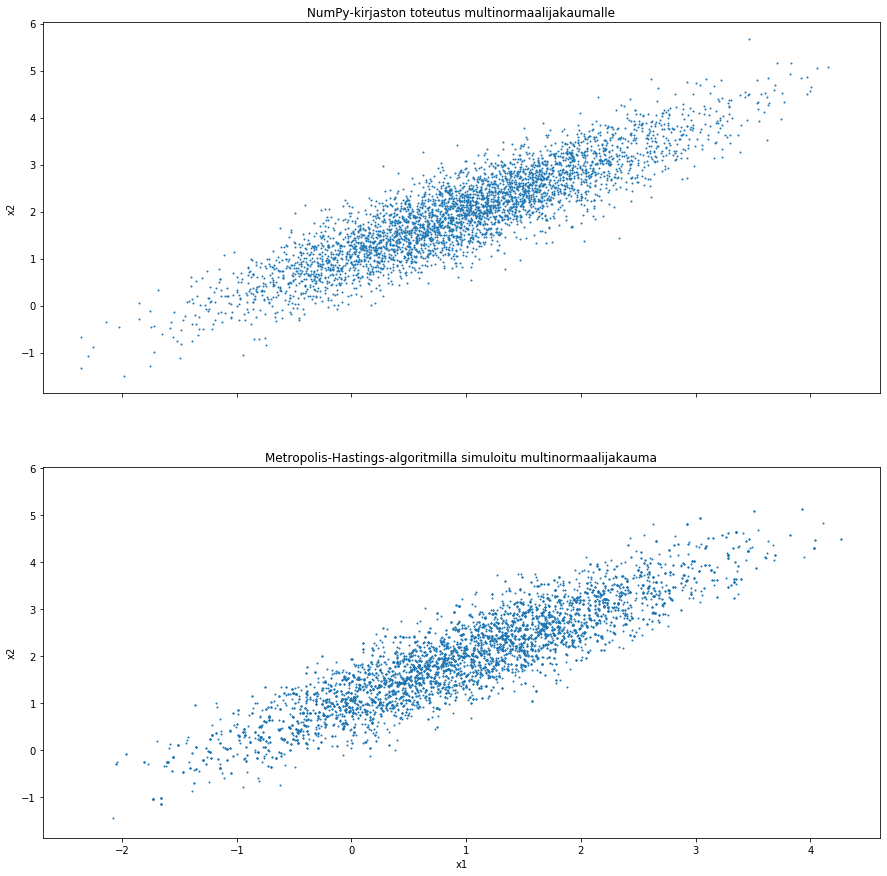

In [5]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].scatter(numpy_multinormal[0], numpy_multinormal[1], s=1)
ax[0].set_title("NumPy-kirjaston toteutus multinormaalijakaumalle")
ax[1].scatter(chain_without_burn_in[0,:,:], chain_without_burn_in[1,:,:], s=1)
ax[1].set_title("Metropolis-Hastings-algoritmilla simuloitu multinormaalijakauma")

for axis in ax.flat:
    axis.set(xlabel='x1', ylabel='x2')
    axis.label_outer()
    
plt.show()